### Decision Tree - Clustering Notebook

#### Maliha Lodi

The model chosen for this clustering has an accuracy of **88.8%**, after performing feature selection using forward selection. The research done to create the model can be found here: https://github.com/afnanrahman/EAFP/blob/main/notebooks/decision_tree.ipynb

### Importing packages and data

In [22]:
import pickle 

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/afnanrahman/EAFP/main/data/one_hot_encoded_smote_data.csv")
data

,age,daily_rate,distance_from_home,education,employee_number,environment_satisfaction,hourly_rate,job_involvement,job_level,job_satisfaction,...,job_role_research_scientist,job_role_sales_executive,job_role_sales_representative,marital_status_divorced,marital_status_married,marital_status_single,over_time_no,over_time_yes,attrition,rate_avg
0,41,1102,1,2,1,2,94,3,2,4,...,0,1,0,0,0,1,0,1,1,6891.67
1,49,279,8,1,2,3,61,2,2,2,...,1,0,0,0,1,0,1,0,0,8415.67
2,37,1373,2,2,4,4,92,2,1,3,...,0,0,0,0,0,1,0,1,1,1287.00
3,33,1392,3,4,5,4,56,3,1,3,...,1,0,0,0,1,0,0,1,0,8202.33
4,27,591,2,1,7,1,40,3,1,2,...,0,0,0,0,1,0,1,0,0,5754.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,35,326,7,1,1882,2,47,3,1,2,...,0,0,0,0,0,0,1,0,1,1524.67
2462,33,1319,18,2,417,1,67,3,1,3,...,0,0,0,0,0,1,0,1,1,2014.33
2463,31,381,25,4,837,1,83,2,1,3,...,0,0,0,0,0,0,0,0,1,6180.00
2464,41,480,23,2,559,2,79,2,2,2,...,0,1,0,0,1,0,0,0,1,2166.67


### Decision Tree Classifier 
I will be referencing my results from the `one_hot_decision_tree.ipynb` notebook. I found out through my previous work that a Decision Tree model with **only** feature selection and **no** hyperparameter tuning outputs the best accuracy and model metrics. 

As such, I am using only those selected features (which where discovered in my previous research available in the `one_hot_decision_tree.ipynb` file).

In [3]:
selected_features = ['job_involvement', 'job_level', 'department_human_resources',
       'department_research_&_development', 'department_sales',
       'job_role_healthcare_representative', 'job_role_human_resources',
       'job_role_laboratory_technician', 'job_role_manager',
       'job_role_manufacturing_director', 'job_role_research_director',
       'job_role_research_scientist', 'marital_status_divorced',
       'marital_status_married', 'marital_status_single', 'over_time_no',
       'over_time_yes']

X = data[selected_features]
Y = data['attrition']

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [5]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [6]:
dt_Y_pred = dt.predict(X_test)

In [7]:
dt.score(X_test, Y_test)

0.8878378378378379

### Creating pickle file for the model

In [40]:
pickle_file = open('decision_tree_pickle.sav', "wb")
pickle.dump(dt, pickle_file)

### Clustering on the predictions

#### Connecting predictions to the entire dataset

In [8]:
dt_all_preds = dt.predict(X)
preds_df = pd.DataFrame({'predict_attrition': dt_all_preds})

In [9]:
len(dt_all_preds)

2466

In [10]:
len(X)

2466

In [11]:
data_copy = data.drop(['attrition'], axis=1).copy() #don't want to include the attrition column here

In [12]:
pred_attr = pd.concat([data_copy, preds_df], axis=1)
no_attr = pred_attr[pred_attr['predict_attrition'] == 1]
no_attr

,age,daily_rate,distance_from_home,education,employee_number,environment_satisfaction,hourly_rate,job_involvement,job_level,job_satisfaction,...,job_role_research_scientist,job_role_sales_executive,job_role_sales_representative,marital_status_divorced,marital_status_married,marital_status_single,over_time_no,over_time_yes,rate_avg,predict_attrition
0,41,1102,1,2,1,2,94,3,2,4,...,0,1,0,0,0,1,0,1,6891.67,1
2,37,1373,2,2,4,4,92,2,1,3,...,0,0,0,0,0,1,0,1,1287.00,1
14,28,103,24,3,19,3,50,2,1,3,...,0,0,0,0,0,1,0,1,4366.67,1
19,38,371,2,3,24,4,45,3,1,4,...,1,0,0,0,0,1,0,1,1574.00,1
21,36,1218,9,4,27,3,82,2,1,1,...,0,0,1,0,0,1,1,0,2762.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,35,326,7,1,1882,2,47,3,1,2,...,0,0,0,0,0,0,1,0,1524.67,1
2462,33,1319,18,2,417,1,67,3,1,3,...,0,0,0,0,0,1,0,1,2014.33,1
2463,31,381,25,4,837,1,83,2,1,3,...,0,0,0,0,0,0,0,0,6180.00,1
2464,41,480,23,2,559,2,79,2,2,2,...,0,1,0,0,1,0,0,0,2166.67,1


In [13]:
kmeans = KMeans(n_clusters = 3, random_state = 42)

In [14]:
drop_attr = no_attr.drop("predict_attrition", axis = 1)

### t-SNE Visualization

In [15]:
tsne = TSNE(n_components = 2, learning_rate = 'auto', random_state = 42, perplexity = 80)
tsne_comps = tsne.fit_transform(drop_attr)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [16]:
tsne_comps_df = pd.DataFrame(data=tsne_comps, columns=['TSNE_1', 'TSNE_2'])
kmeans_3 = kmeans.fit_predict(drop_attr)

tsne_comps_df['cluster'] = kmeans_3

Text(0, 0.5, 'TSNE_2')

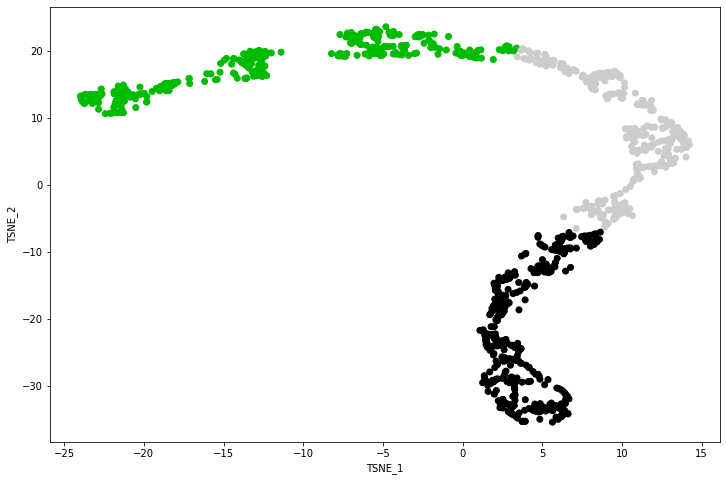

In [17]:
plt.figure(figsize=(12,8))
plt.scatter(tsne_comps_df['TSNE_1'],tsne_comps_df['TSNE_2'], c = tsne_comps_df['cluster'], cmap='nipy_spectral')

plt.xlabel('TSNE_1')
plt.ylabel('TSNE_2')

In [18]:
s_score = silhouette_score(drop_attr, kmeans.labels_)
s_score

0.570935984629157

### Cluster Interpretation

In [19]:
pred_attr_clusters = no_attr.copy()
pred_attr_clusters['cluster'] = kmeans_3
pred_attr_clusters

,age,daily_rate,distance_from_home,education,employee_number,environment_satisfaction,hourly_rate,job_involvement,job_level,job_satisfaction,...,job_role_sales_executive,job_role_sales_representative,marital_status_divorced,marital_status_married,marital_status_single,over_time_no,over_time_yes,rate_avg,predict_attrition,cluster
0,41,1102,1,2,1,2,94,3,2,4,...,1,0,0,0,1,0,1,6891.67,1,1
2,37,1373,2,2,4,4,92,2,1,3,...,0,0,0,0,1,0,1,1287.00,1,0
14,28,103,24,3,19,3,50,2,1,3,...,0,0,0,0,1,0,1,4366.67,1,2
19,38,371,2,3,24,4,45,3,1,4,...,0,0,0,0,1,0,1,1574.00,1,0
21,36,1218,9,4,27,3,82,2,1,1,...,0,1,0,0,1,1,0,2762.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,35,326,7,1,1882,2,47,3,1,2,...,0,0,0,0,0,1,0,1524.67,1,0
2462,33,1319,18,2,417,1,67,3,1,3,...,0,0,0,0,1,0,1,2014.33,1,0
2463,31,381,25,4,837,1,83,2,1,3,...,0,0,0,0,0,0,0,6180.00,1,2
2464,41,480,23,2,559,2,79,2,2,2,...,1,0,0,1,0,0,0,2166.67,1,0


In [20]:
pred_attr_clusters['cluster'].value_counts() / len(pred_attr_clusters)

0    0.367673
1    0.323268
2    0.309059
Name: cluster, dtype: float64

In [25]:
num_cols = ["rate_avg", "distance_from_home", "age", "years_in_current_role", 
            "total_working_years", "years_at_company", "percent_salary_hike",
            "years_with_curr_manager"]

exploded_variables = ['business_travel_non-_travel', 'business_travel_travel_frequently','business_travel_travel_rarely', 'department_human_resources',
       'department_research_&_development', 'department_sales', 'education_field_human_resources', 'education_field_life_sciences', 'education_field_marketing', 'education_field_medical',
       'education_field_other', 'education_field_technical_degree','gender_female', 'gender_male', 'job_role_healthcare_representative','job_role_human_resources', 'job_role_laboratory_technician',
       'job_role_manager', 'job_role_manufacturing_director', 'job_role_research_director', 'job_role_research_scientist','job_role_sales_executive', 'job_role_sales_representative',
       'marital_status_divorced', 'marital_status_married','marital_status_single', 'over_time_no', 'over_time_yes']

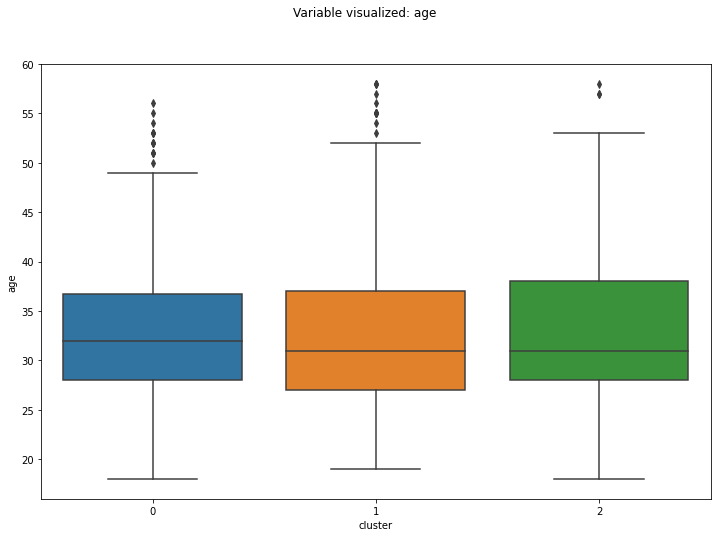

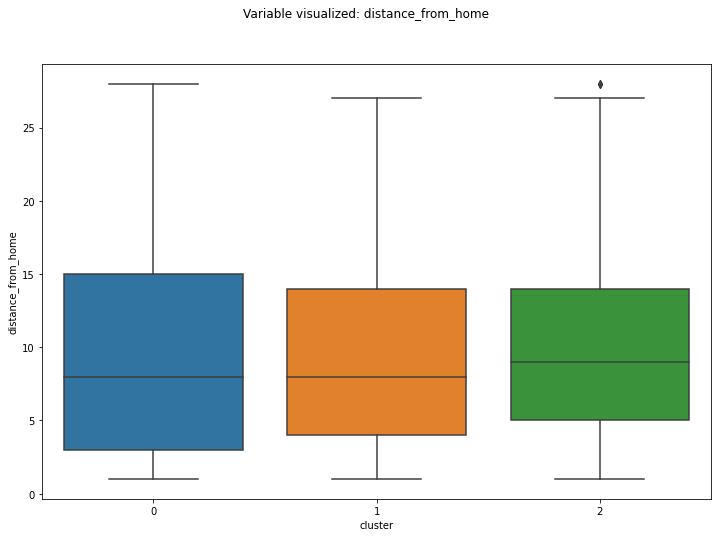

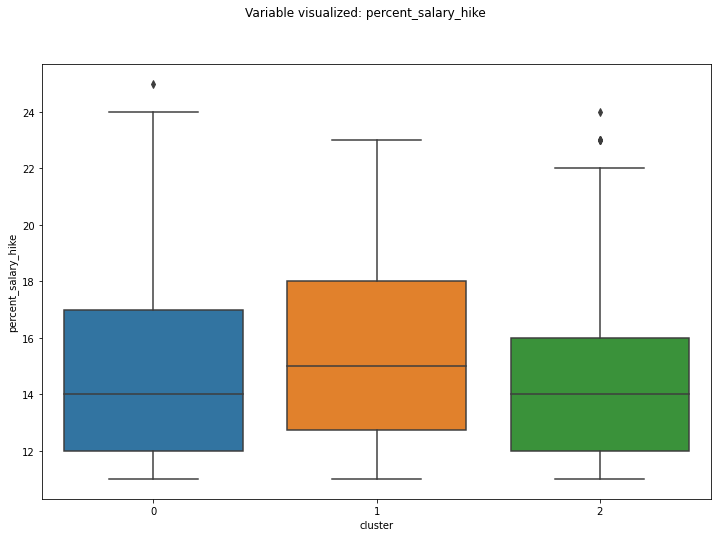

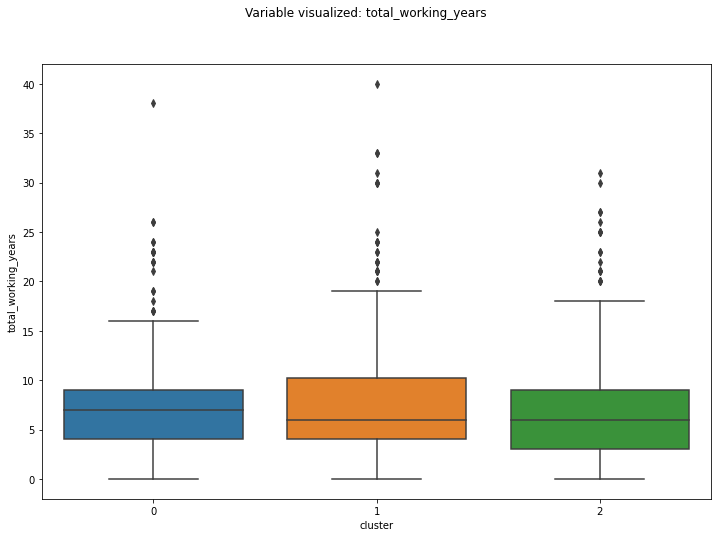

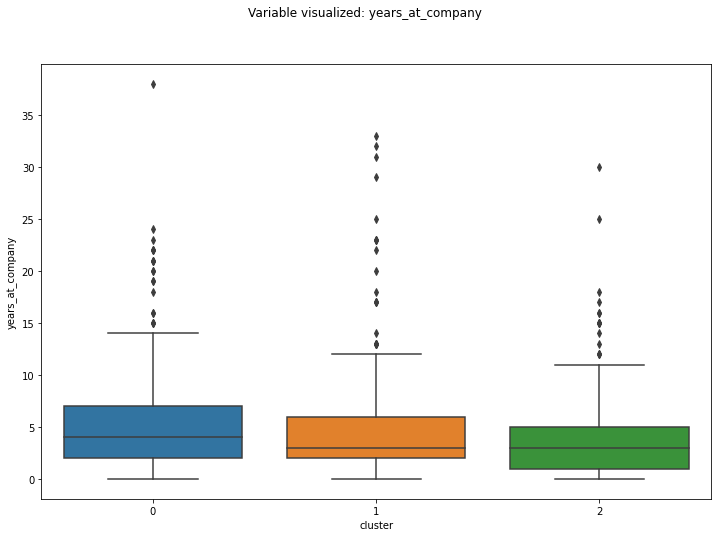

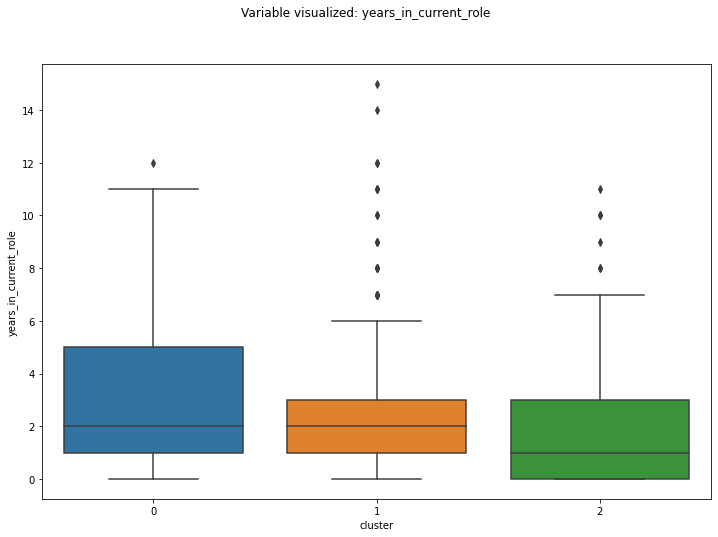

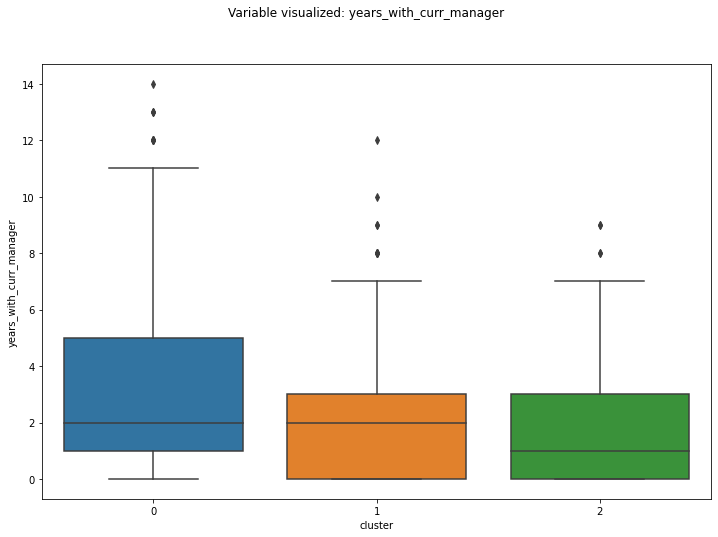

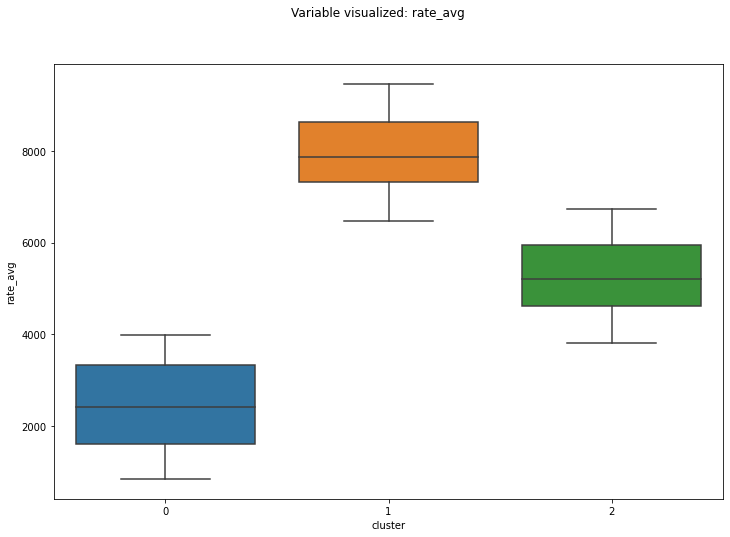

In [26]:
#Creating box plots for all the numerical variables to see the distribution of values
for col in pred_attr_clusters:
  if col in num_cols:
    fig, axs = plt.subplots(1, 1, figsize=(12,8))
    sns.boxplot(x="cluster", y=col, data=pred_attr_clusters, ax=axs)
    fig.suptitle(f"Variable visualized: {col}")
    fig.show()

In [31]:
exploded_vars = pd.DataFrame(pred_attr_clusters[exploded_variables]).reset_index()
clusters = pred_attr_clusters['cluster'].reset_index()

In [32]:
cluster_exploded_vars = exploded_vars.merge(clusters, on="index")
cluster_exploded_vars = (cluster_exploded_vars.drop(['index'], axis=1).groupby(['cluster']).sum().transpose())

Text(0, 0.5, 'Exploded Variable')

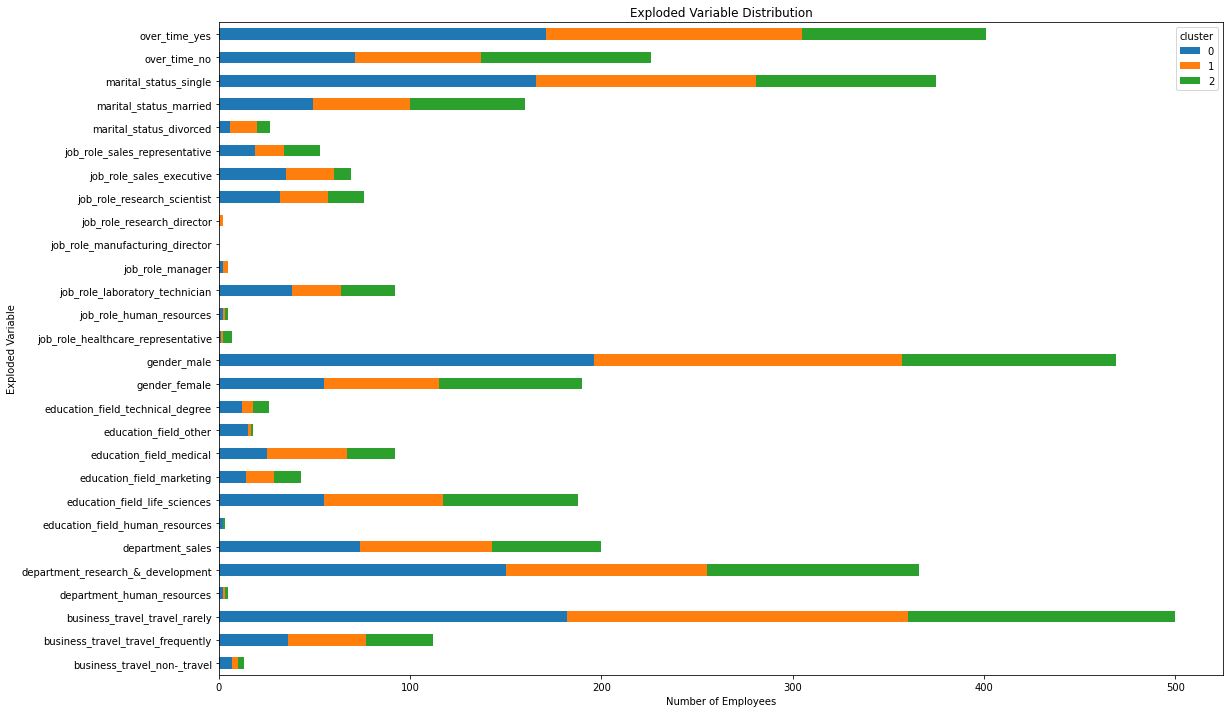

In [39]:
# create stacked bar chart
cluster_exploded_vars.plot(kind='barh', stacked=True)

# Add Title and Labels
plt.rcParams['figure.figsize'] = (18,12)
plt.title('Exploded Variable Distribution')
plt.xlabel('Number of Employees')
plt.ylabel('Exploded Variable')

### Cluster 0
About 37% of all employees who are predicted to quit are contained within this cluster. Majority of these employees are single, male employees who typically do overtime, and are in the R&D/sales departments. They have job titles such as: sales representative, research scientist and lab technician. They also do not travel a lot for their job and are in their late 20s to mid 30s. These employees have been in the workforce for about 4-9 years, with 2-7 of those years at their current company. Compared to other clusters, they have also spent the most amount of time in their current role with their current manager and have not had salary increases, resulting in them being paid the least. 

### Cluster 1
About 32% of all employees who are predicted to quit are contained within this cluster. These employees are mostly divorced males who have educational backgrounds in medicine and life sciences. They are in their mid 20s to mid 30s. These employees also travel more frequently when compared to cluster 0 and they also have the highest pay out of all the clusters as they have received pay increases throughout the years. They have been working for 4-10 years in total, the most working years out of all the clusters. However they tend to job hop and not stay at one company for too long. As a result, they have been at their current company for about 1-3 years.

### Cluster 2
About 31% of all employees who are predicted to quit are contained within this cluster. This cluster is the most balanced in terms of gender, having an almost equal amount of males and females. Like cluster 0, majority of the employees here have jobs in the R&D/sales departments with educational backgrounds in life sciences. The employees in this cluster have spent more time in current role when companred to cluster 1, staying for ~1-3 years. But there also are employees here which leave within their first year. Additionally, this cluster has the oldest employees, with them being in their late 20s to late 30s.